# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [11]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [12]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

Numbers of remain columns 65
AMT_INCOME_TOTAL   Range:  25650.0 ~ 117000000.0


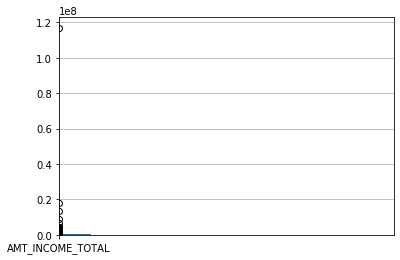

AMT_CREDIT   Range:  45000.0 ~ 4050000.0


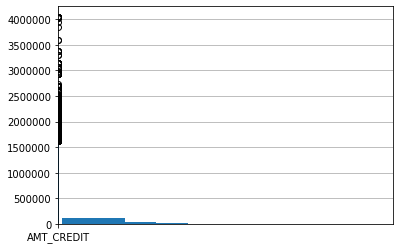

AMT_ANNUITY   Range:  1615.5 ~ 258025.5


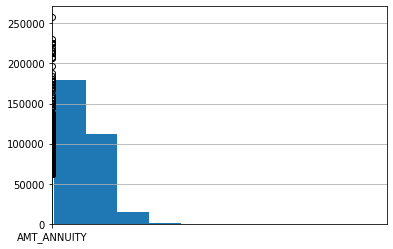

AMT_GOODS_PRICE   Range:  40500.0 ~ 4050000.0


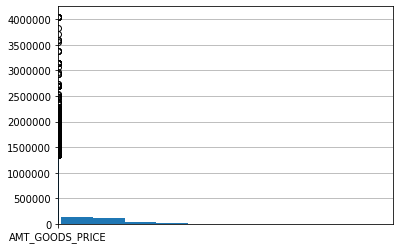

REGION_POPULATION_RELATIVE   Range:  0.00029 ~ 0.072508


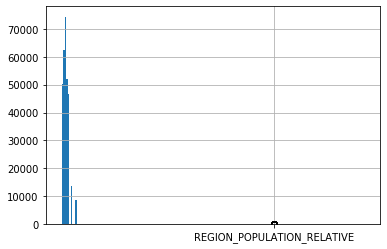

DAYS_REGISTRATION   Range:  -24672.0 ~ 0.0


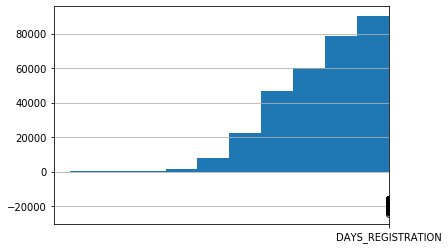

OWN_CAR_AGE   Range:  0.0 ~ 91.0


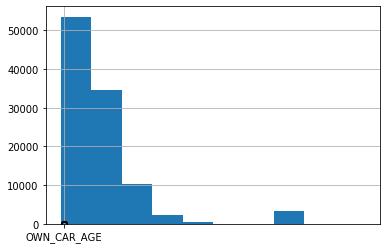

CNT_FAM_MEMBERS   Range:  1.0 ~ 20.0


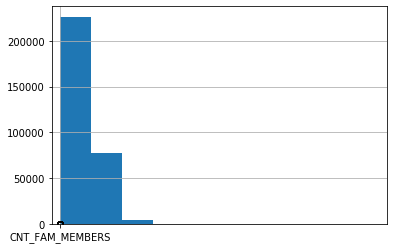

EXT_SOURCE_1   Range:  0.014568132412445587 ~ 0.962692770561306


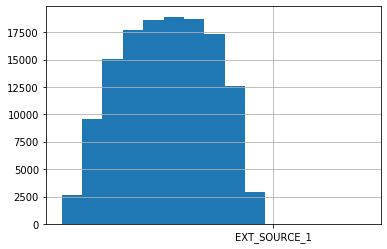

EXT_SOURCE_2   Range:  8.173616518884397e-08 ~ 0.8549996664047012


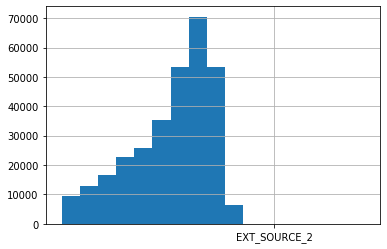

EXT_SOURCE_3   Range:  0.0005272652387098817 ~ 0.8960095494948396


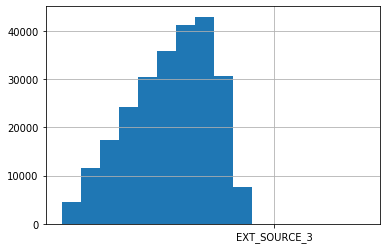

APARTMENTS_AVG   Range:  0.0 ~ 1.0


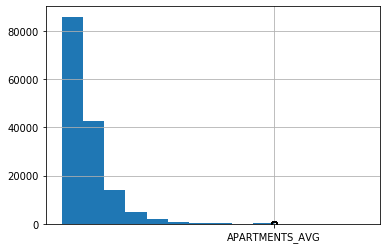

BASEMENTAREA_AVG   Range:  0.0 ~ 1.0


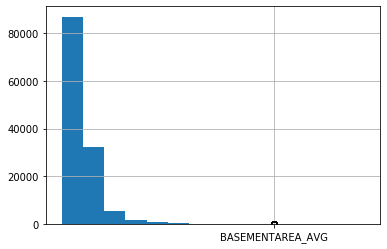

YEARS_BEGINEXPLUATATION_AVG   Range:  0.0 ~ 1.0


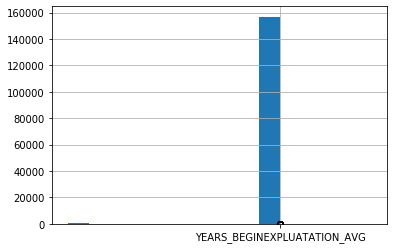

YEARS_BUILD_AVG   Range:  0.0 ~ 1.0


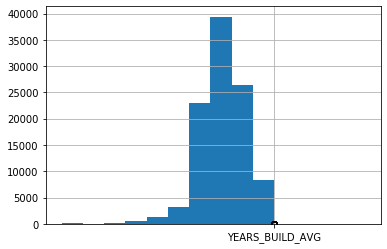

COMMONAREA_AVG   Range:  0.0 ~ 1.0


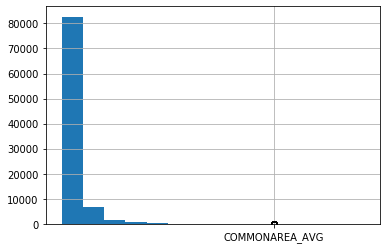

ELEVATORS_AVG   Range:  0.0 ~ 1.0


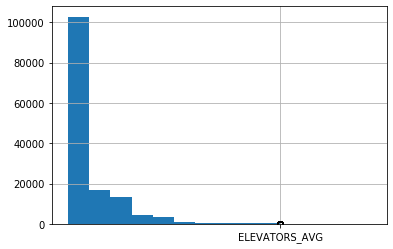

ENTRANCES_AVG   Range:  0.0 ~ 1.0


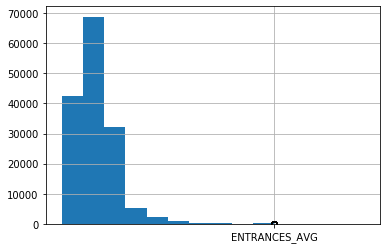

FLOORSMAX_AVG   Range:  0.0 ~ 1.0


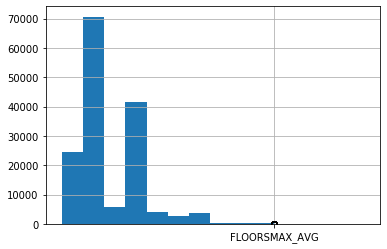

FLOORSMIN_AVG   Range:  0.0 ~ 1.0


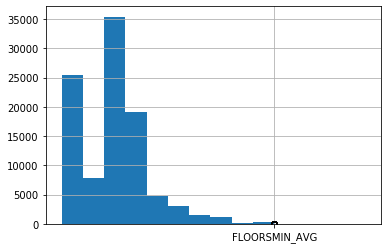

LANDAREA_AVG   Range:  0.0 ~ 1.0


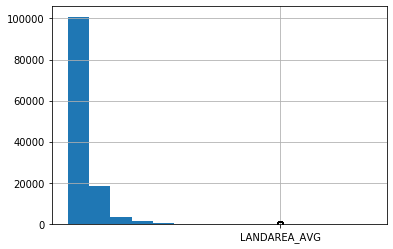

LIVINGAPARTMENTS_AVG   Range:  0.0 ~ 1.0


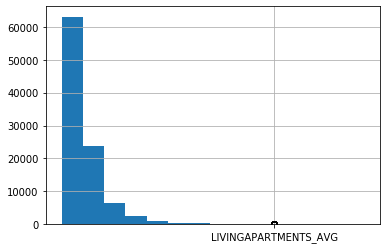

LIVINGAREA_AVG   Range:  0.0 ~ 1.0


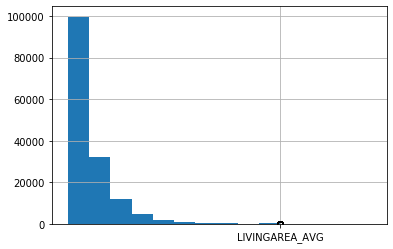

NONLIVINGAPARTMENTS_AVG   Range:  0.0 ~ 1.0


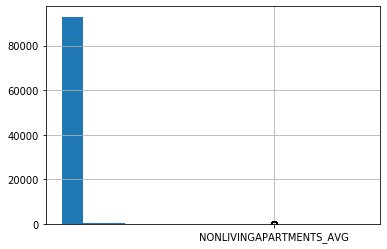

NONLIVINGAREA_AVG   Range:  0.0 ~ 1.0


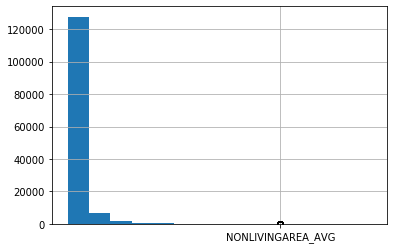

APARTMENTS_MODE   Range:  0.0 ~ 1.0


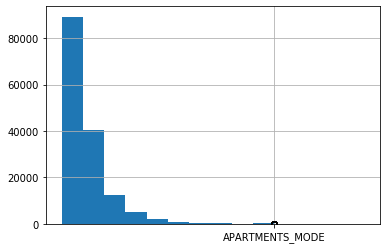

BASEMENTAREA_MODE   Range:  0.0 ~ 1.0


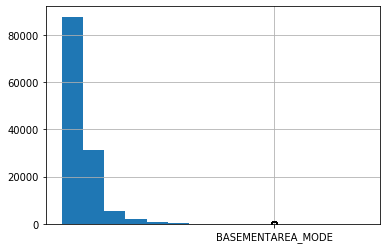

YEARS_BEGINEXPLUATATION_MODE   Range:  0.0 ~ 1.0


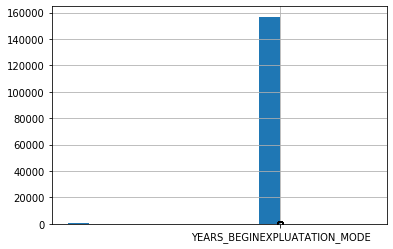

YEARS_BUILD_MODE   Range:  0.0 ~ 1.0


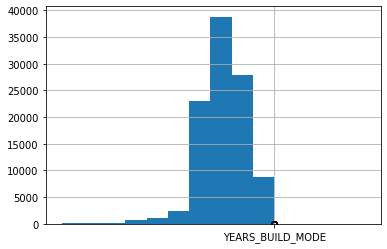

COMMONAREA_MODE   Range:  0.0 ~ 1.0


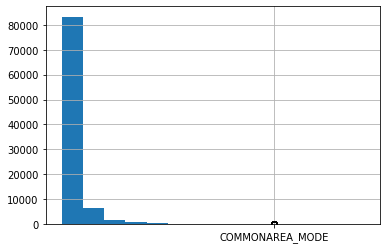

ELEVATORS_MODE   Range:  0.0 ~ 1.0


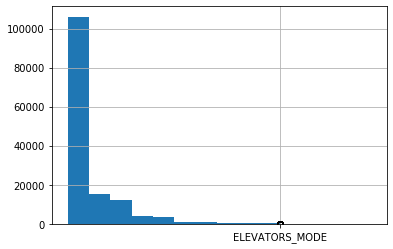

ENTRANCES_MODE   Range:  0.0 ~ 1.0


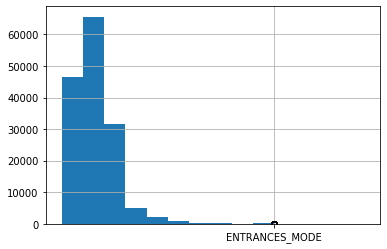

FLOORSMAX_MODE   Range:  0.0 ~ 1.0


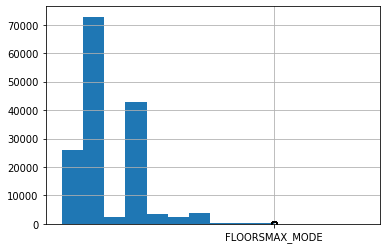

FLOORSMIN_MODE   Range:  0.0 ~ 1.0


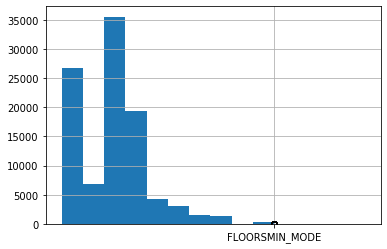

LANDAREA_MODE   Range:  0.0 ~ 1.0


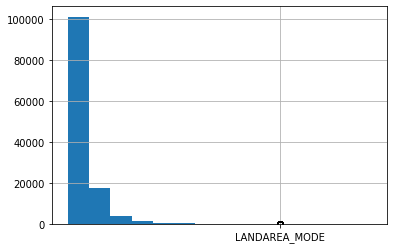

LIVINGAPARTMENTS_MODE   Range:  0.0 ~ 1.0


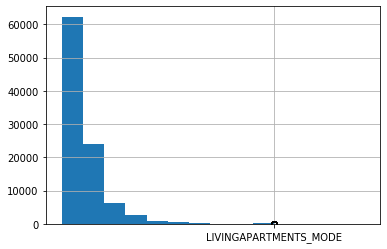

LIVINGAREA_MODE   Range:  0.0 ~ 1.0


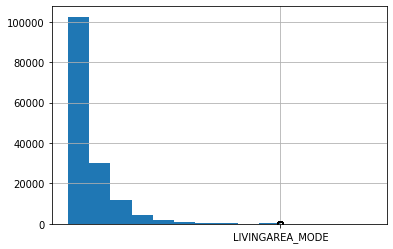

NONLIVINGAPARTMENTS_MODE   Range:  0.0 ~ 1.0


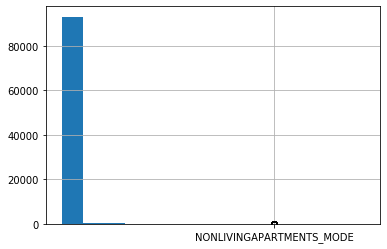

NONLIVINGAREA_MODE   Range:  0.0 ~ 1.0


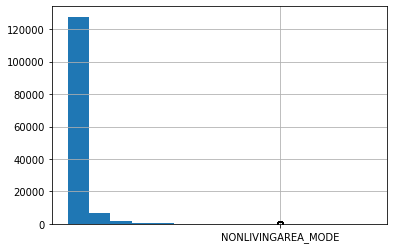

APARTMENTS_MEDI   Range:  0.0 ~ 1.0


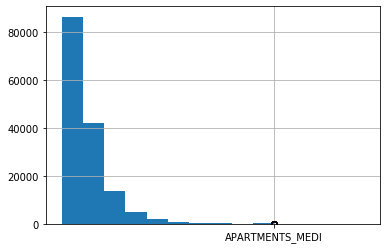

BASEMENTAREA_MEDI   Range:  0.0 ~ 1.0


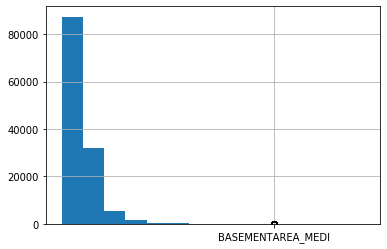

YEARS_BEGINEXPLUATATION_MEDI   Range:  0.0 ~ 1.0


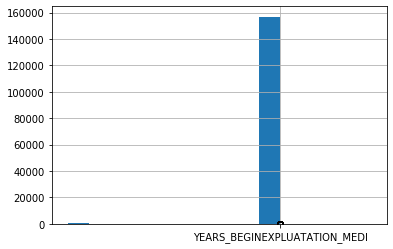

YEARS_BUILD_MEDI   Range:  0.0 ~ 1.0


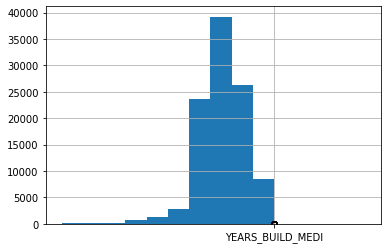

COMMONAREA_MEDI   Range:  0.0 ~ 1.0


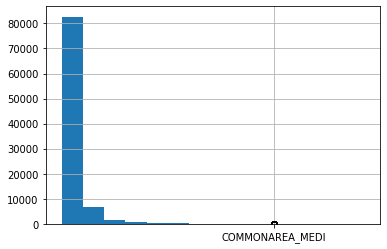

ELEVATORS_MEDI   Range:  0.0 ~ 1.0


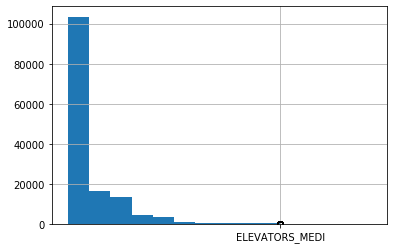

ENTRANCES_MEDI   Range:  0.0 ~ 1.0


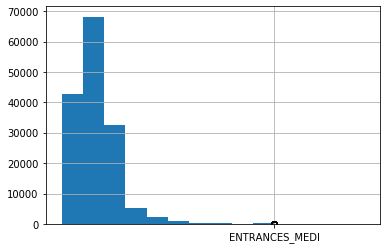

FLOORSMAX_MEDI   Range:  0.0 ~ 1.0


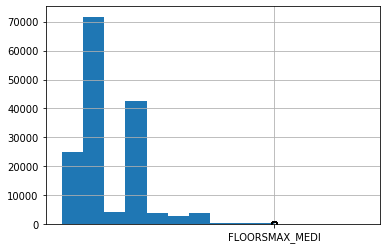

FLOORSMIN_MEDI   Range:  0.0 ~ 1.0


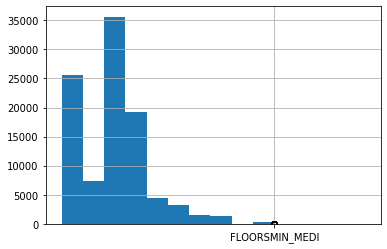

LANDAREA_MEDI   Range:  0.0 ~ 1.0


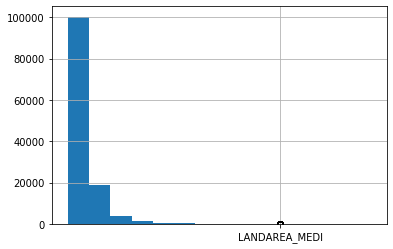

LIVINGAPARTMENTS_MEDI   Range:  0.0 ~ 1.0


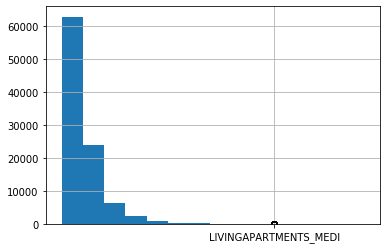

LIVINGAREA_MEDI   Range:  0.0 ~ 1.0


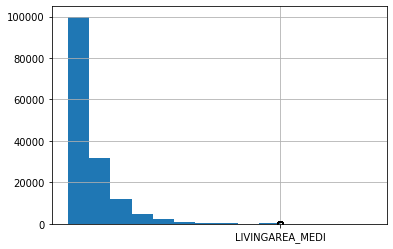

NONLIVINGAPARTMENTS_MEDI   Range:  0.0 ~ 1.0


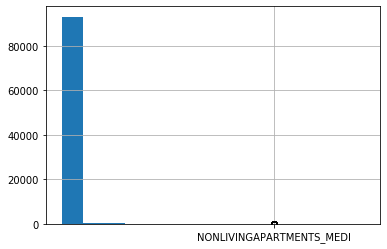

NONLIVINGAREA_MEDI   Range:  0.0 ~ 1.0


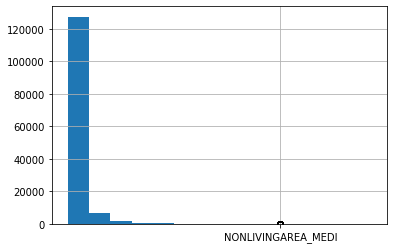

TOTALAREA_MODE   Range:  0.0 ~ 1.0


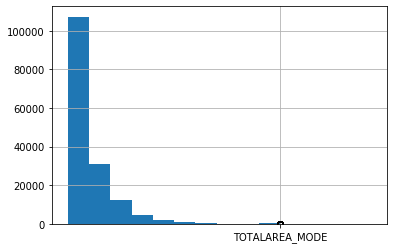

OBS_30_CNT_SOCIAL_CIRCLE   Range:  0.0 ~ 348.0


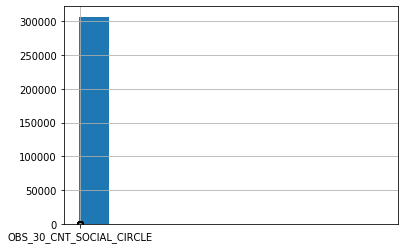

DEF_30_CNT_SOCIAL_CIRCLE   Range:  0.0 ~ 34.0


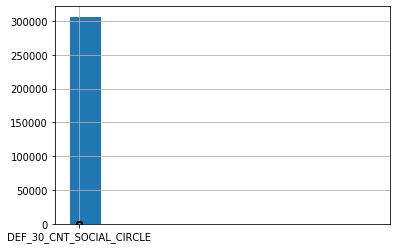

OBS_60_CNT_SOCIAL_CIRCLE   Range:  0.0 ~ 344.0


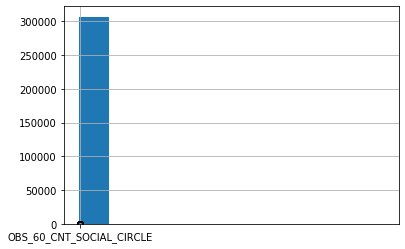

DEF_60_CNT_SOCIAL_CIRCLE   Range:  0.0 ~ 24.0


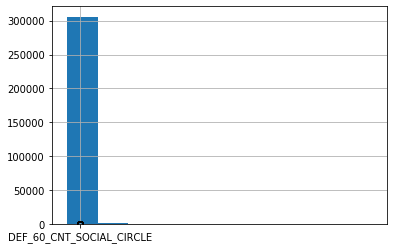

DAYS_LAST_PHONE_CHANGE   Range:  -4292.0 ~ 0.0


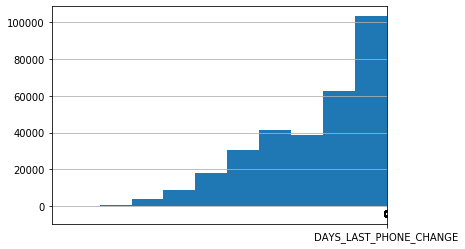

AMT_REQ_CREDIT_BUREAU_HOUR   Range:  0.0 ~ 4.0


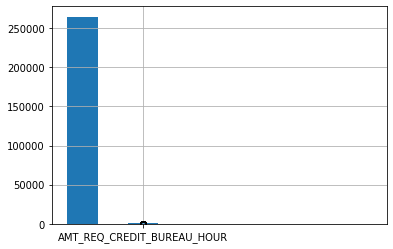

AMT_REQ_CREDIT_BUREAU_DAY   Range:  0.0 ~ 9.0


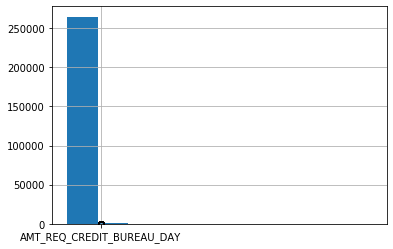

AMT_REQ_CREDIT_BUREAU_WEEK   Range:  0.0 ~ 8.0


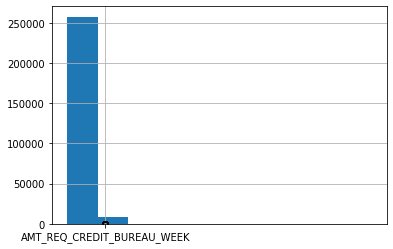

AMT_REQ_CREDIT_BUREAU_MON   Range:  0.0 ~ 27.0


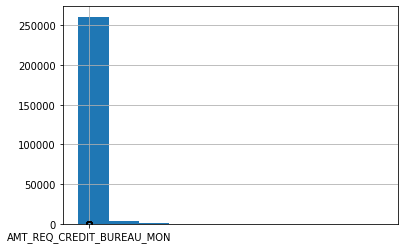

AMT_REQ_CREDIT_BUREAU_QRT   Range:  0.0 ~ 261.0


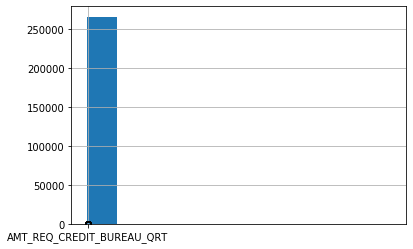

AMT_REQ_CREDIT_BUREAU_YEAR   Range:  0.0 ~ 25.0


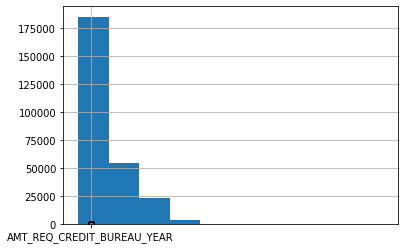

In [17]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = [np.dtype('float64')]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])

print("Numbers of remain columns" , len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:

    print(col,"  Range: ", app_train[col].min(), "~", app_train[col].max())
   
    app_train.boxplot(col)
    
    app_train[col].hist()
    
    plt.show()

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


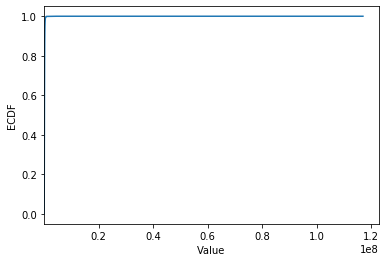

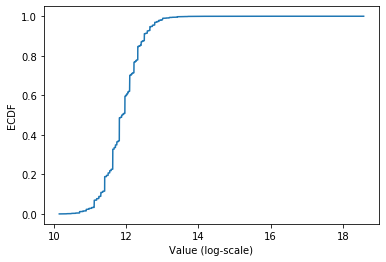

In [18]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


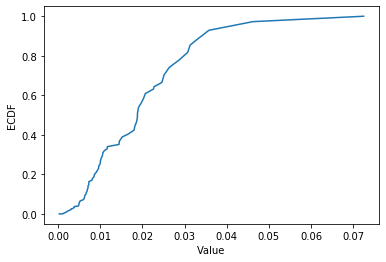

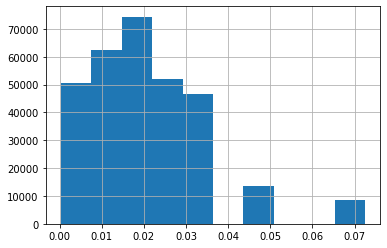

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
            ...  
0.001417      467
0.001333      235
0.000533       39
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [19]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train.REGION_POPULATION_RELATIVE.value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


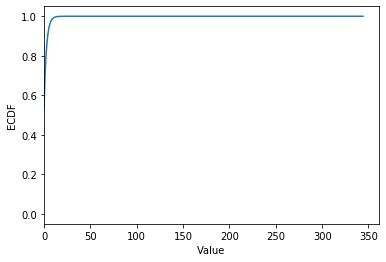

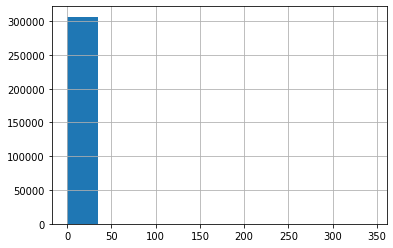

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [21]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

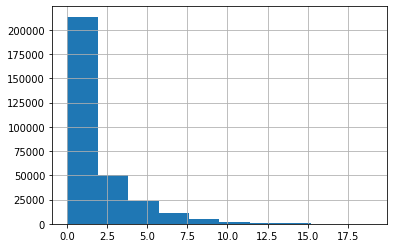

In [22]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製

loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE']<20

loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()